# Final Project
## Housing price prediction

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np

%matplotlib inline

### import the dataset from csv file

In [7]:
dataset = pd.read_csv('house_prediction_data.csv')

### drop NaNs

In [8]:
dataset = dataset.replace(np.nan,0,regex=True)

### Dropped the heads because of NaN

In [9]:
dataset= dataset.drop(labels=["Alley","PoolQC","Fence"],axis=1)

### show dataset head

In [10]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000.0
7,8,60,RL,0.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000.0


### Feature Engineering

Create discrete numerical features from descriptions.

In [11]:
def description_to_number(dataset, key):
    _map = {}
    _number = []
    for cond in dataset[key]:
        if cond not in _map.keys():
            _map[cond] = len(_map.keys())
        _number.append(_map[cond])
    dataset['Numerical' + key] = _number
    return dataset

dataset = description_to_number(dataset, 'Street')
dataset = description_to_number(dataset,'GarageType')
dataset = description_to_number(dataset, 'CentralAir')
dataset = description_to_number(dataset, 'SaleCondition')
dataset = description_to_number(dataset, 'HeatingQC')

### method to check the different values in an attribute

<AxesSubplot:ylabel='None'>

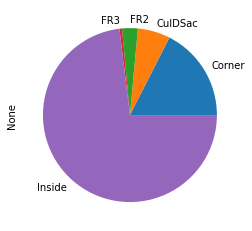

In [12]:
dataset.groupby('LotConfig').size().plot(kind='pie')

<AxesSubplot:xlabel='TotRmsAbvGrd'>

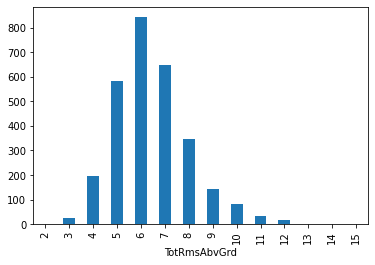

In [13]:
dataset.groupby('TotRmsAbvGrd').size().plot(kind='bar')

<AxesSubplot:xlabel='GarageArea'>

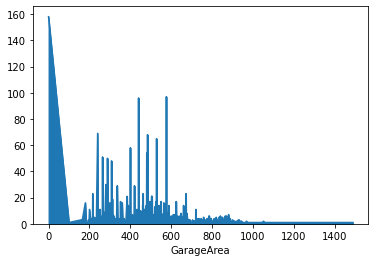

In [14]:
dataset.groupby('GarageArea').size().plot(kind='area')

### checking the descriptions of variables

In [15]:
dataset['GarageCars'].describe()

count    2919.000000
mean        1.766016
std         0.762196
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [16]:
dataset.isnull().sum()


Id                        0
MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
                         ..
NumericalStreet           0
NumericalGarageType       0
NumericalCentralAir       0
NumericalSaleCondition    0
NumericalHeatingQC        0
Length: 83, dtype: int64

In [17]:
dataset['GarageCars']=dataset['GarageCars'].replace(to_replace=np.nan,value='2')
dataset.isnull().sum()


Id                        0
MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
                         ..
NumericalStreet           0
NumericalGarageType       0
NumericalCentralAir       0
NumericalSaleCondition    0
NumericalHeatingQC        0
Length: 83, dtype: int64

<AxesSubplot:xlabel='GarageCars'>

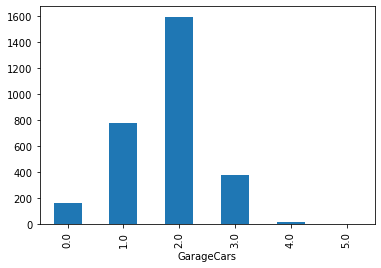

In [18]:
dataset.groupby('GarageCars').size().plot(kind='bar')

## Price Distribution

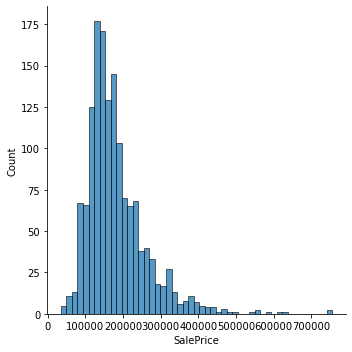

In [19]:
sns.displot(dataset['SalePrice'][dataset['SalePrice'] >= 1.0])

## testing different input attributes to get the best prediction

In [20]:
neighborhood_dict = {}
for i, item in enumerate(dataset['Neighborhood']):
    if item not in neighborhood_dict.keys():
        neighborhood_dict[item] = []
        
    neighborhood_dict[item].append(dataset['SalePrice'][i])
    
avg_prices = {}
std_prices = {}
for neighborhood in neighborhood_dict.keys():
    avg_price = np.mean(neighborhood_dict[neighborhood])
    avg_prices[neighborhood] = avg_price
    std_prices[neighborhood] = np.std(neighborhood_dict[neighborhood])
    

data = [avg_prices[item] for item in dataset['Neighborhood']] 
dataset['NeighborhoodAvgPrice'] = data

In [21]:
key1 = ['NumericalSaleCondition','FullBath','YrSold']
key2 = ['NumericalSaleCondition','FullBath', 'YrSold', 'GarageCars']
key3 = ['OverallQual', 'GarageCars','LotArea','FullBath','YrSold']
key4 = ['OverallQual', 'GarageCars','LotArea', 'OverallCond', 'YrSold']
key5 = ['OverallQual', 'YearBuilt', 'GrLivArea','TotalBsmtSF','OverallCond', 'FullBath']
key = ['OverallQual', 'GarageCars', 'GrLivArea','NeighborhoodAvgPrice', 'TotRmsAbvGrd','WoodDeckSF', 'Fireplaces']

keys_to_test = [key1, key2, key3, key4, key5, key]


# Heatmap of selected parameters

<AxesSubplot:>

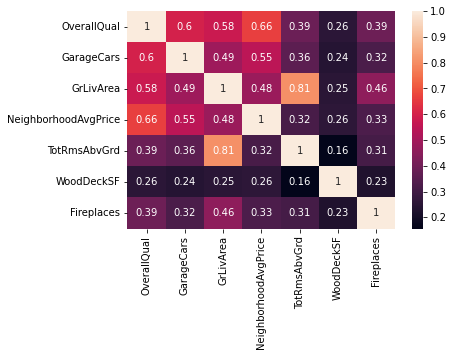

In [22]:
sns.heatmap(dataset[key].corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
import sklearn

In [25]:
from sklearn.linear_model import LinearRegression

# Linear regression and comparison of different input parameters to various metrics 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['NumericalSaleCondition', 'FullBath', 'YrSold']
{'r2_score': 0.3148605762169834, 'mse_value': 4337646195.451488, 'explained_variance': 0.3148800286983151, 'mean_abs_percent_error': 0.27159513920426864}
#########################
['NumericalSaleCondition', 'FullBath', 'YrSold', 'GarageCars']
{'r2_score': 0.4754445365940748, 'mse_value': 3320982461.617333, 'explained_variance': 0.4754572061444924, 'mean_abs_percent_error': 0.2394950936145899}
#########################
['OverallQual', 'GarageCars', 'LotArea', 'FullBath', 'YrSold']
{'r2_score': 0.6729832314529094, 'mse_value': 2070356766.3716288, 'explained_variance': 0.6730665002259423, 'mean_abs_percent_error': 0.18658116388501209}
#########################
['OverallQual', 'GarageCars', 'LotArea', 'OverallCond', 'YrSold']
{'r2_score': 0.6602999219177275, 'mse_value': 2150655326.695664, 'explained_variance': 0.6604177706377856, 'mean_abs_percent_error': 0.19208051610419907}
#########################
['OverallQual', 'YearBuilt', 'GrLivArea

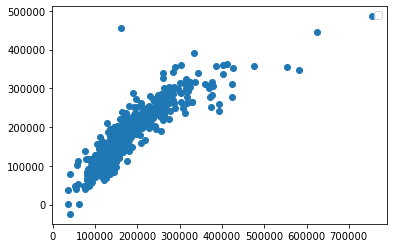

In [26]:
results_from_scan = []
for keys in keys_to_test:
    X = dataset[keys][dataset['SalePrice']>=1.0]
    y = dataset['SalePrice'][dataset['SalePrice']>= 1.0]
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)

    results = {}
    results['r2_score'] = sklearn.metrics.r2_score(y_test.values,predictions)
    results['mse_value'] = sklearn.metrics.mean_squared_error(y_test.values, predictions)
    results['explained_variance'] = sklearn.metrics.explained_variance_score(y_test.values, predictions)
    results['mean_abs_percent_error'] = sklearn.metrics.mean_absolute_percentage_error(y_test.values, predictions)
    results_from_scan.append(results)
    print(keys)
    print(results)
    print("#########################")
plt.scatter(y_test, predictions)
plt.legend()

Text(0, 0.5, 'R2 Score')

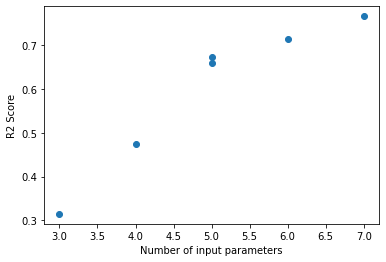

In [27]:
r2_scores = [results['r2_score'] for results in results_from_scan]
num_params = [len(key) for key in keys_to_test]
plt.scatter(num_params, r2_scores)
plt.xlabel('Number of input parameters')
plt.ylabel('R2 Score')

## re: above graph; by increasing the number of input parameters, we increase the r2 score

## distribution plot of absolute error of the ground truth vs the predictions

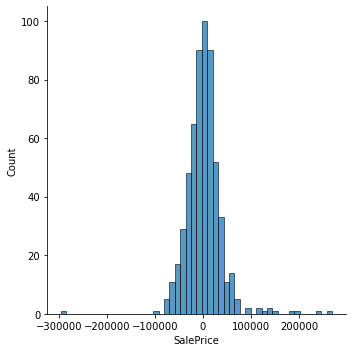

In [28]:
sns.displot((y_test-predictions),bins=50)

# Simple UI for calculating average house price based on 6 important parameters

In [29]:
def preprocess_inputs():
    inputs = []
    input_parameters = key
    for item in input_parameters:
    
        if item == 'NeighborhoodAvgPrice':
            item = 'Neighborhood'
            entry = input(f"Enter {item}: ")
            entry = avg_prices[entry]
        else:
            entry = input(f"Enter {item}: ")
        
        inputs.append(float(entry))

    inputs = np.array(inputs).reshape(1, -1)
    return inputs
    
inputs = preprocess_inputs()

print(f"Predicted housing price: $ {lm.predict(inputs)}")
    

Enter OverallQual: 22
Enter GarageCars: 2
Enter GrLivArea: 23
Enter Neighborhood: 2


KeyError: '2'

## Scatter plot for average house prices in each neighborhood

dict_keys(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'])


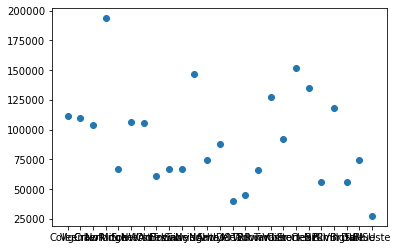

In [30]:
plt.scatter(avg_prices.keys(), avg_prices.values())
print(avg_prices.keys())

## Selecting the vrailbles depending on house prediction 

In [ ]:
X = dataset[keys][dataset['SalePrice']>=1.0]
y = dataset['SalePrice'][dataset['SalePrice']>= 1.0]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## selection Model 
### 1. Linear regression

In [34]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)


0.7958950099025848

### 2.Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
decmodel=DecisionTreeRegressor()
decmodel.fit(X_train,y_train)
decmodel.score(X_train,y_train)

0.9998754894528653

### 3. Random Forest Regression


In [40]:
from sklearn.ensemble import RandomForestRegressor
ranmodel=RandomForestRegressor(n_estimators=10,random_state=0)
ranmodel.fit(X_train,y_train.values.ravel())
ranmodel.score(X_train,y_train)

0.9730441652884694

### 4.Navie bayes Regression

In [43]:
from sklearn.naive_bayes import GaussianNB
navmodel=GaussianNB()
navmodel.fit(X_train,y_train.values.ravel())
navmodel.score(X_train,y_train)


0.4623287671232877

### 5 .SVM regression

In [45]:
from sklearn.svm import SVR
svrmodel=SVR(kernel='rbf', gamma='auto')
svrmodel.fit(X_train,y_train.values.ravel())
svrmodel.score(X_train,y_train)

-0.054487801156545945

### 6. KNN classification

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train,y_train.values.ravel())
knnmodel.score(X_train,y_train)

0.9897260273972602

### 7.Logistic Regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X_train)
polymodel=LinearRegression()
polymodel.fit(X_poly,y_train)
polymodel.score(X_poly,y_train)

0.8571298102739455

## From the above all models we can say that Decision tree is best model

In [51]:
y_predicted=pd.DataFrame(decmodel.predict(X_test),index=y_test.index)
z=pd.concat([y_test,y_predicted],axis='columns')
z.head()

,SalePrice,0
1054,255000.0,236500.0
361,145000.0,137500.0
1282,150500.0,138000.0
161,412500.0,380000.0
515,402861.0,465000.0


## MODEL USED 
 
#### 	EFFICIENCY 
##### Decision tree 	99.221% 
##### Linear Regression 	79%  
##### Logistic Regression 	85% 
##### SVM (support vector machine) 	95% 
##### Random Forest 	95% 
##### Naïve Bayes 	46% 
##### K Nearest Neighbor 	98% 
